In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
results_dir = '../results'

Load the results into a pandas dataframe

In [2]:
dir_names = sorted([fname
                    for fname in os.listdir(results_dir)
                    if os.path.isdir(join(results_dir, fname))
                    and os.path.exists(join(results_dir, fname, 'results.pkl'))
                    ])
results_list = []
for dir_name in tqdm(dir_names):
    ser = pd.Series(
        pkl.load(open(join(results_dir, dir_name, 'results.pkl'), "rb")))
    results_list.append(ser)

r = pd.concat(results_list, axis=1).T.infer_objects()
r.to_pickle(join(results_dir, 'results_aggregated.pkl'))

100%|██████████| 8/8 [00:00<00:00, 3599.10it/s]


In [3]:
r

,dataset_name,subsample_frac,seed,save_dir,model_name,alpha,max_depth,use_cache,acc_cv,acc_test
0,rotten_tomatoes,1,2,results,ridge,1.0,2,1,0.716698,0.737336
1,rotten_tomatoes,1,2,results,decision_tree,1.0,3,1,0.502814,0.613508
2,rotten_tomatoes,1,2,results,ridge,0.1,2,1,0.703565,0.677298
3,rotten_tomatoes,1,1,results,decision_tree,1.0,2,1,0.504690,0.600375
4,rotten_tomatoes,1,1,results,ridge,0.1,2,1,0.703565,0.677298
5,rotten_tomatoes,1,1,results,ridge,1.0,2,1,0.716698,0.737336
6,rotten_tomatoes,1,1,results,decision_tree,1.0,3,1,0.500938,0.613508
7,rotten_tomatoes,1,2,results,decision_tree,1.0,2,1,0.504690,0.600375


In [4]:
# average over random seeds
ravg = (
    r
    .groupby(by=[k for k in r.columns if not k == 'seed' and not k.startswith('acc')])
    .mean()
    .reset_index()
)
ravg

,dataset_name,subsample_frac,save_dir,model_name,alpha,max_depth,use_cache,seed,acc_cv,acc_test
0,rotten_tomatoes,1,results,decision_tree,1.0,2,1,1.5,0.504690,0.600375
1,rotten_tomatoes,1,results,decision_tree,1.0,3,1,1.5,0.501876,0.613508
2,rotten_tomatoes,1,results,ridge,0.1,2,1,1.5,0.703565,0.677298
3,rotten_tomatoes,1,results,ridge,1.0,2,1,1.5,0.716698,0.737336


In [5]:
# apply cross validation
(
    ravg
    .sort_values(by='acc_cv', ascending=False)
    .groupby(by=['model_name', 'dataset_name'])
    .first()
)

,,subsample_frac,save_dir,alpha,max_depth,use_cache,seed,acc_cv,acc_test
model_name,dataset_name,,,,,,,,
decision_tree,rotten_tomatoes,1,results,1.0,2,1,1.5,0.504690,0.600375
ridge,rotten_tomatoes,1,results,1.0,2,1,1.5,0.716698,0.737336


/home/chansingh/.embgam/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


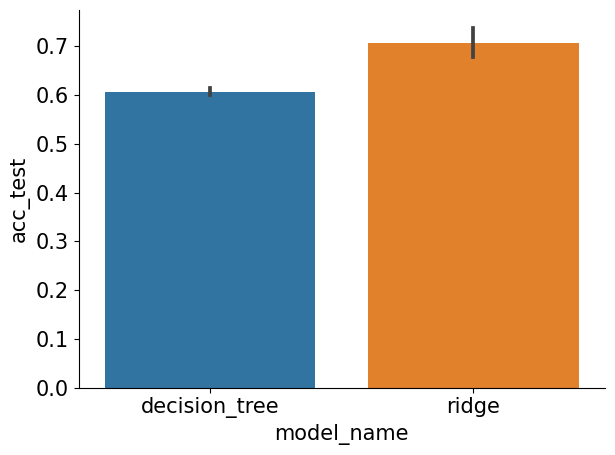

In [9]:
sns.barplot(data=ravg, x='model_name', y='acc_test') #, hue='dataset_name')
plt.show()